# Import Libraries

In [1]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

/workspaces/groceries/EDA


# Verbindung zur DB

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Verbindung zur SQLite-Datenbank herstellen (Pfad zur Datenbank anpassen)
conn = sqlite3.connect('../groceries_database.db')  # Der Pfad '../' geht eine Ebene nach oben, wenn Ihr Notebook in /EDA/ liegt.

# SQL-Abfrage, um Daten aus der Tabelle butter_table zu erhalten
query = "SELECT * FROM butter_table"
df = pd.read_sql_query(query, conn)

# Schließen der Datenbankverbindung
conn.close()

# Überprüfen der abgerufenen Daten
print(df.head())

# Hier können Sie Ihre Analyse und Grafikerstellung durchführen, z.B.:
# plt.hist(df['price_per_100g'], bins=20)
# plt.show()


  product_type web-scraper-order  \
0       butter      1698754764-1   
1       butter      1698754764-2   
2       butter      1698754764-3   
3       butter      1698754764-4   
4       butter      1698754764-5   

                               web-scraper-start-url  \
0  https://www.aldi-now.ch/de/milchprodukte-&-eie...   
1  https://www.aldi-now.ch/de/milchprodukte-&-eie...   
2  https://www.aldi-now.ch/de/milchprodukte-&-eie...   
3  https://www.aldi-now.ch/de/milchprodukte-&-eie...   
4  https://www.aldi-now.ch/de/milchprodukte-&-eie...   

                        productname_raw  price_raw  weight_raw Supermarkt  \
0                            Die Butter       3.95         250       Aldi   
1         RETOUR AUX SOURCES BIO Butter       4.19         200       Aldi   
2  BIO NATURA Butter 100 g, laktosefrei       2.95         100       Aldi   
3                    MILFINA Kochbutter       3.49         250       Aldi   
4                 MILFINA Kräuterbutter       2.85         10

# Non graphical analysis    

In [3]:
import sqlite3
import pandas as pd

# Verbindung zur SQLite-Datenbank herstellen (Pfad zur Datenbank anpassen)
conn = sqlite3.connect('../groceries_database.db')  # Der Pfad '../' geht eine Ebene nach oben, wenn dein Notebook in /EDA/ liegt.

# Query the SQL-table for all records (angepasst an deine Tabelle und Spalten)
query = '''
    SELECT product_type, Supermarkt, price_per_100g
    FROM butter_table
'''

# Daten aus der Datenbank abrufen
df_all = pd.read_sql_query(query, conn)

# Überprüfen, ob es Ergebnisse gibt
if not df_all.empty:
    # Durchschnittspreise pro Produkt und Supermarkt
    average_prices = df_all.groupby(['Supermarkt', 'product_type'])['price_per_100g'].mean()
    print("Durchschnittspreise pro Produkt und Supermarkt:")
    print(average_prices)

    # Günstigster Durchschnittspreis pro Produkt
    cheapest_avg_price = df_all.groupby('product_type')['price_per_100g'].min()
    print("\nGünstigster Durchschnittspreis pro Produkt:")
    print(cheapest_avg_price)

    # Supermarkt mit dem günstigsten Durchschnittspreis pro Produkt
    for product in df_all['product_type'].unique():
        cheapest_supermarket = df_all[df_all['product_type'] == product].sort_values(by='price_per_100g').iloc[0]['Supermarkt']
        print(f"\nGünstigster Supermarkt für {product}: {cheapest_supermarket}")

    # Standardabweichung der Preise pro Produkt und Supermarkt
    std_dev_prices = df_all.groupby(['Supermarkt', 'product_type'])['price_per_100g'].std()
    print("\nStandardabweichung der Preise pro Produkt und Supermarkt:")
    print(std_dev_prices)

    # Gesamtdurchschnittspreis über alle Produkte und Supermärkte
    overall_avg_price = df_all['price_per_100g'].mean()
    print("\nGesamtdurchschnittspreis über alle Produkte und Supermärkte:")
    print(overall_avg_price)
else:
    print("Die Abfrage hat keine Ergebnisse zurückgegeben.")


Durchschnittspreise pro Produkt und Supermarkt:
Supermarkt  product_type
Aldi        butter          1.711875
Coop        butter          3.007600
Migros      butter          2.682931
Name: price_per_100g, dtype: float64

Günstigster Durchschnittspreis pro Produkt:
product_type
butter    0.48
Name: price_per_100g, dtype: float64

Günstigster Supermarkt für butter: Aldi

Standardabweichung der Preise pro Produkt und Supermarkt:
Supermarkt  product_type
Aldi        butter          0.736543
Coop        butter          2.059957
Migros      butter          1.599372
Name: price_per_100g, dtype: float64

Gesamtdurchschnittspreis über alle Produkte und Supermärkte:
2.6885483870967746


### KEO KEVIN:

In [4]:
#1.⁠ ⁠Arithmetisches Mittel, Median, Quantile (q-Quantil), Varianz, Standardabweichung und Spannweite:

import pandas as pd

# Angenommen, df ist Ihr DataFrame für Butterdaten
# Ersetzen Sie 'price_per_100g' durch die entsprechende Spalte in Ihrem DataFrame

# Arithmetisches Mittel
mean_value = df['price_per_100g'].mean()

# Median
median_value = df['price_per_100g'].median()

# q-Quantil (z.B. 0.25 für das 25. Quantil)
q_quantile = df['price_per_100g'].quantile(0.25)

# Varianz
variance = df['price_per_100g'].var()

# Standardabweichung
std_dev = df['price_per_100g'].std()

# Spannweite
range_value = df['price_per_100g'].max() - df['price_per_100g'].min()

print(f"Arithmetisches Mittel: {mean_value}")
print(f"Median: {median_value}")
print(f"25% Quantil: {q_quantile}")
print(f"Varianz: {variance}")
print(f"Standardabweichung: {std_dev}")
print(f"Spannweite: {range_value}")

#2.⁠ ⁠Lineare Regression:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Annahme: Verwenden Sie eine geeignete unabhängige Variable (z.B. 'weight_raw') und 'price_per_100g' als abhängige Variable
X = df[['weight_raw']]  # Merkmal
y = df['price_per_100g']  # Zielvariable

# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression-Modell erstellen und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen für Testdaten
y_pred = model.predict(X_test)

# Bewertung des Modells
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Arithmetisches Mittel: 2.6885483870967746
Median: 2.2
25% Quantil: 1.73
Varianz: 3.107514948859166
Standardabweichung: 1.762814496440044
Spannweite: 9.4
Mean Squared Error: 5.82084032366105


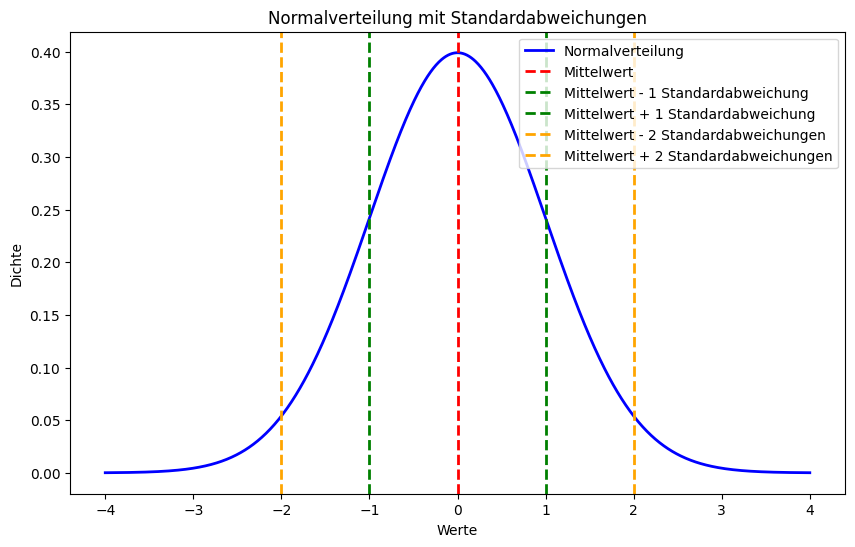

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Annahme: Verwenden Sie Mittelwert 0, Standardabweichung 1 (Standardnormalverteilung)
mean = 0
std_dev = 1

# Erzeugung von Werten für die Normalverteilung
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 1000)
pdf = norm.pdf(x, mean, std_dev)

# Plot der Normalverteilung
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Normalverteilung', color='blue', linewidth=2)

# Markierung von Standardabweichungen
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mittelwert')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=2, label='Mittelwert - 1 Standardabweichung')
plt.axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=2, label='Mittelwert + 1 Standardabweichung')
plt.axvline(mean - 2 * std_dev, color='orange', linestyle='dashed', linewidth=2, label='Mittelwert - 2 Standardabweichungen')
plt.axvline(mean + 2 * std_dev, color='orange', linestyle='dashed', linewidth=2, label='Mittelwert + 2 Standardabweichungen')

# Beschriftungen und Legende
plt.title('Normalverteilung mit Standardabweichungen')
plt.xlabel('Werte')
plt.ylabel('Dichte')
plt.legend()

plt.show()


# Graphical analysis (new)

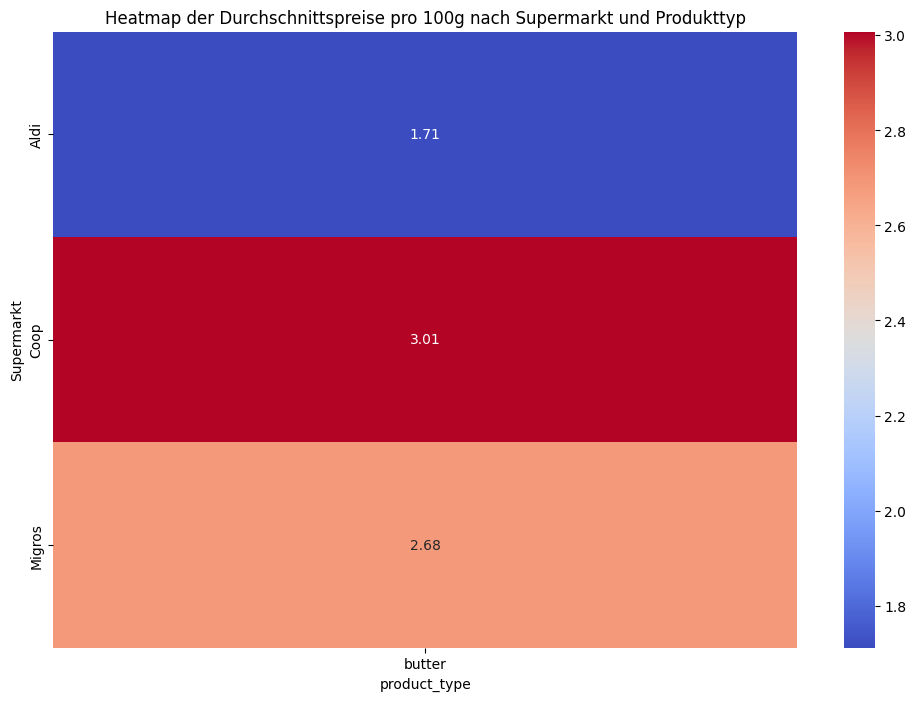

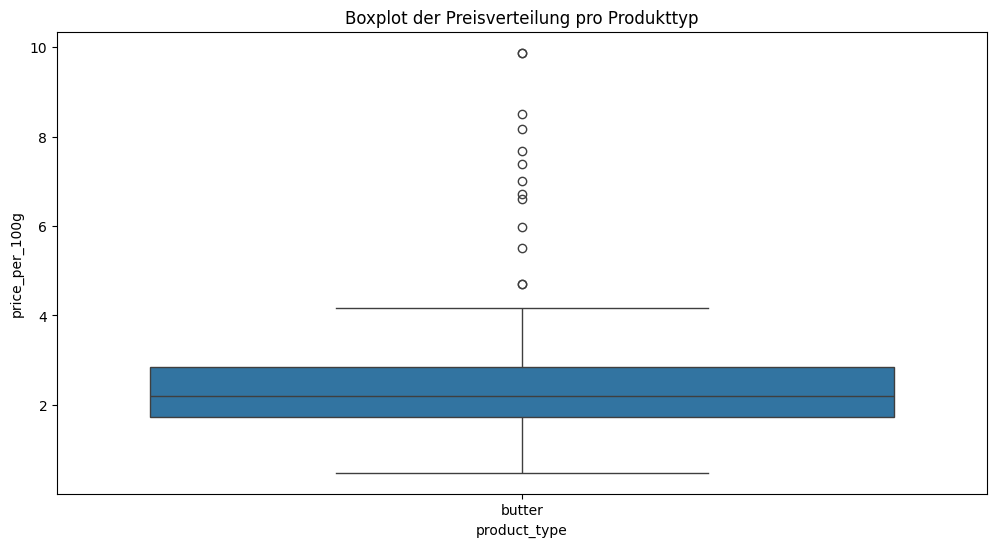

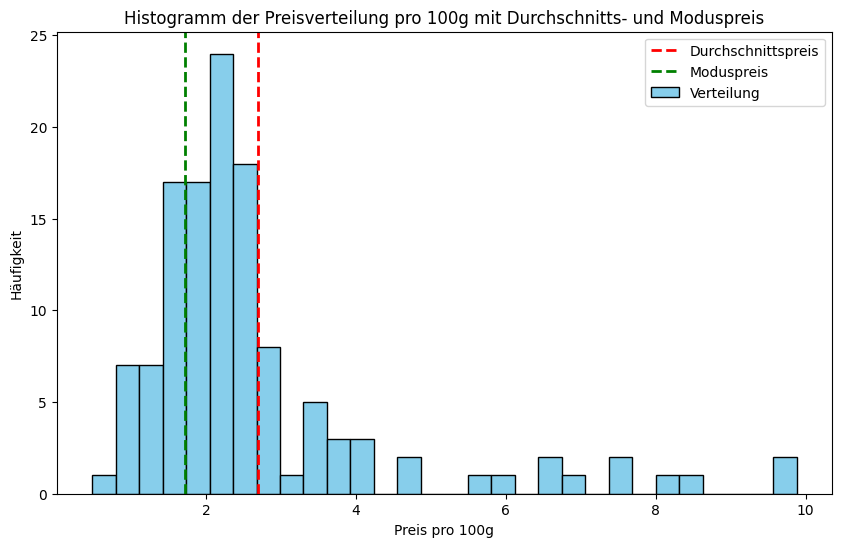

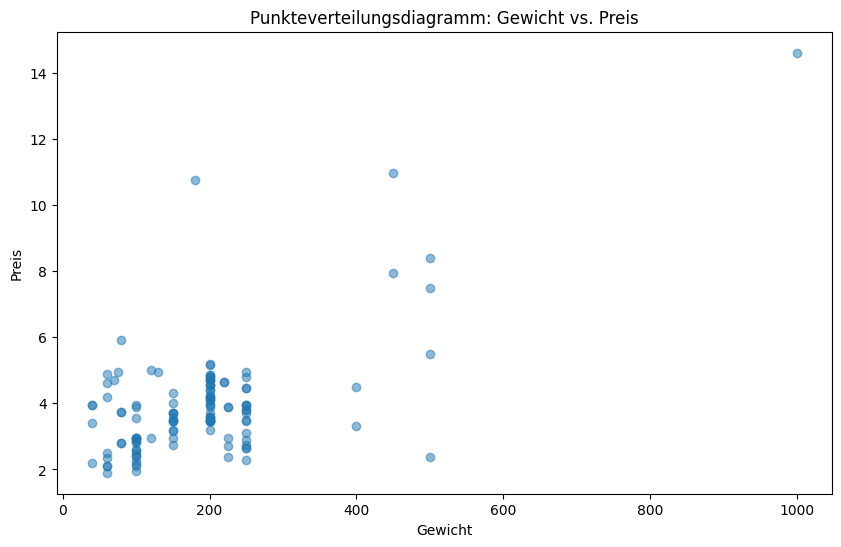

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Erstellen einer Pivot-Tabelle für die Heatmap
heatmap_data = df.pivot_table('price_per_100g', index='Supermarkt', columns='product_type', aggfunc='mean')

# Erstellen der Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap der Durchschnittspreise pro 100g nach Supermarkt und Produkttyp')
plt.show()

# Boxplot der Preisverteilung pro Produkttyp
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_type', y='price_per_100g', data=df)
plt.title('Boxplot der Preisverteilung pro Produkttyp')
plt.show()

# Histogramm der Preisverteilung
plt.figure(figsize=(10, 6))
plt.hist(df['price_per_100g'], bins=30, color='skyblue', edgecolor='black')

# Berechnung des Durchschnittspreises und Hinzufügen einer Linie
mean_price = np.mean(df['price_per_100g'])
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2)

# Berechnung des häufigsten Preises (Modus) und Hinzufügen einer Linie
mode_price = df['price_per_100g'].mode()[0]
plt.axvline(mode_price, color='green', linestyle='dashed', linewidth=2)

# Hinzufügen von Beschriftungen
plt.title('Histogramm der Preisverteilung pro 100g mit Durchschnitts- und Moduspreis')
plt.xlabel('Preis pro 100g')
plt.ylabel('Häufigkeit')
plt.legend(['Durchschnittspreis', 'Moduspreis', 'Verteilung'])

plt.show()


# Punkteverteilungsdiagramm von Preis vs. Gewicht
plt.figure(figsize=(10, 6))
plt.scatter(df['weight_raw'], df['price_raw'], alpha=0.5)
plt.title('Punkteverteilungsdiagramm: Gewicht vs. Preis')
plt.xlabel('Gewicht')
plt.ylabel('Preis')
plt.show()


# Graphical analysis

In [7]:


# Histogramm
plt.hist(df_all['price_raw'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Preis')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Preise')
plt.show()

# Boxplot
plt.boxplot(df_all['price_raw'])
plt.ylabel('Preis')
plt.title('Boxplot der Preise')
plt.show()

# Streudiagramm
plt.scatter(df_all['weight_raw'], df_all['price_raw'], alpha=0.5, color='green')
plt.xlabel('Gewicht')
plt.ylabel('Preis')
plt.title('Streudiagramm: Gewicht vs. Preis')
plt.show()

# Balkendiagramm
df_all['Supermarkt'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Supermarkt')
plt.ylabel('Anzahl Produkte')
plt.title('Anzahl der Produkte pro Supermarkt')
plt.show()


KeyError: 'price_raw'